### ***MNIST Handwritten Digit Classification using Deep Learning (Neural Network)***

#### Importing the dependencies

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.datasets import mnist
from keras import activations
from tensorflow.math import confusion_matrix


#### Loading the MNIST data from keras.datasets

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
# Shape of the numpy array
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Trainig Data = 60000 images     
Test Data = 10000 images

Image Dimensions --> 28 * 28     
Grayscale Image --> 1 Channel

In [15]:
# Printing the 10th image 
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [16]:
print(X_train[10].shape)

(28, 28)


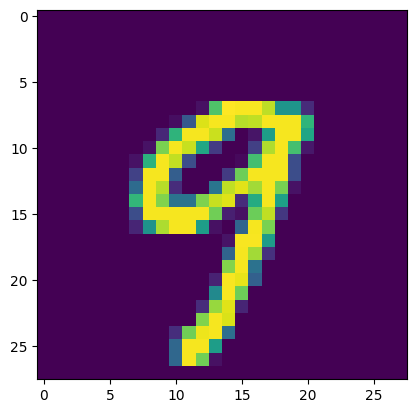

9


In [24]:
# Displaying the image
plt.imshow(X_train[45])
plt.show()

# Print the corresponding label
print(y_train[45])

Image Labels

In [19]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [25]:
# Print the unique value in y_train
print(np.unique(y_train)) 

# Print the unique value in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply OneHotEncoding

All the images have the same dimensions in this datasets. If not, we have to resize all the images to a common dimensions

In [26]:
# Scaling the values

X_train = X_train / 255 
X_test = X_test / 255 

#### Building the Neural Network

In [29]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(70, activation=activations.relu),
    keras.layers.Dense(50, activation=activations.relu),
    keras.layers.Dense(10, activation=activations.sigmoid)
])

In [30]:
# Compiling the Neural Network

model.compile(optimizer='Adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [31]:
# Training the Neural Network

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.2739 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1233 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0898 - accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0701 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0559 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0480 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0414 - accuracy: 0.9860
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0290 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

Training Data Accuracy = 99.10%

In [32]:
# Check accuracy on test data

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.9751
0.9750999808311462


Test Data Accuracy = 97.51%

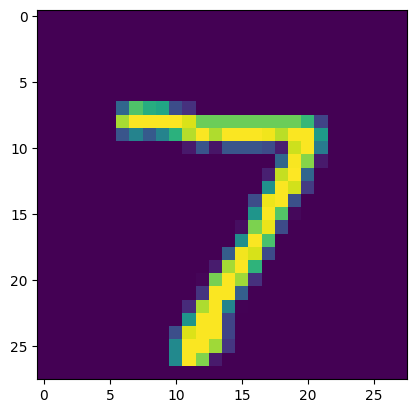

7


In [34]:
# First data point in X_test

plt.imshow(X_test[0])
plt.show()

print(y_test[0])

In [35]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [37]:
# Print the shape of y_pred
print(y_pred.shape)

(10000, 10)


In [38]:
print(y_pred[0])

[3.0468574e-03 1.9952497e-02 2.7200893e-01 9.9456328e-01 5.7803202e-08
 9.1542519e-05 2.0794459e-07 9.9999982e-01 3.9115018e-01 2.4567933e-01]


model.predict() gives the prediction probability of each class for that data point

In [39]:
# Converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [40]:
# Converting the prediction probabilities to class label for all test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 3, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels     
y_pred_labels --> Predicted labels

#### Confusion Metrix

In [41]:
confusion_mat = confusion_matrix(y_test, y_pred_labels)
print(confusion_mat)

tf.Tensor(
[[ 964    0    1    2    1    2    4    1    2    3]
 [   0 1110    2    3    0    2    3    3   12    0]
 [   4    0  989   17    4    0    3    8    7    0]
 [   0    0    1  997    0    7    0    2    2    1]
 [   3    0    2    2  959    1    3    1    1   10]
 [   2    0    0    9    0  877    1    0    2    1]
 [   2    2    0    1    6    6  938    0    3    0]
 [   1    1    6    8    0    1    0 1002    2    7]
 [   6    0    2    9    3    7    0    1  946    0]
 [   3    3    0    8   10    9    1    2    3  970]], shape=(10, 10), dtype=int32)


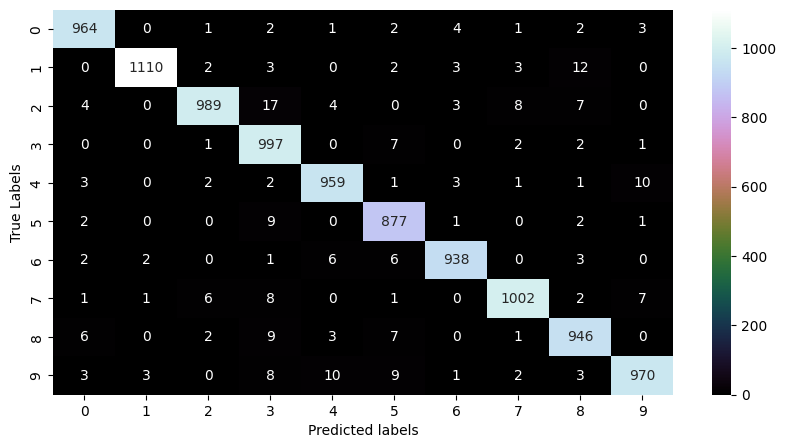

In [45]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='cubehelix')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')
plt.show()

## Building a Predictive System

In [65]:
input_image_path = 'MNIST_7.png'

input_image = cv2.imread(input_image_path)

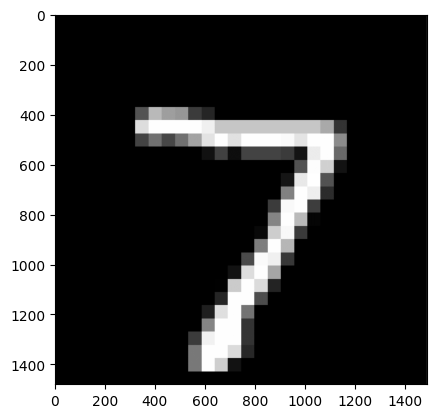

(1480, 1490, 3)


In [66]:
# Displaying the image
plt.imshow(input_image)
plt.show()

# Shape of the image
print(input_image.shape)

It is a RGB image. So, we convert into grayscale image

In [67]:
# Convet it into grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

print(grayscale.shape)

(1480, 1490)


In [68]:
# Resize the image
input_image_resize = cv2.resize(grayscale, (28, 28))

print(input_image_resize.shape)

(28, 28)


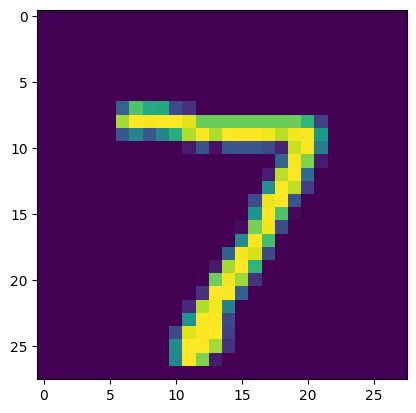

In [69]:
plt.imshow(input_image_resize)
plt.show()

In [70]:
# Scaling the image
input_image_resize = input_image_resize / 255 

In [71]:
# Reshape the image
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [72]:
# Prediction of input_image
input_prediciton = model.predict(image_reshaped)
print(input_prediciton)

input_prediciton_label = np.argmax(input_prediciton)
print(input_prediciton_label)

1/1 [==============================] - 0s 30ms/step
[[2.9887867e-03 2.0421037e-02 2.7422076e-01 9.9452084e-01 6.0952168e-08
  9.2697126e-05 2.0891480e-07 9.9999982e-01 3.8281706e-01 2.5137401e-01]]
7


## **Predictive System**

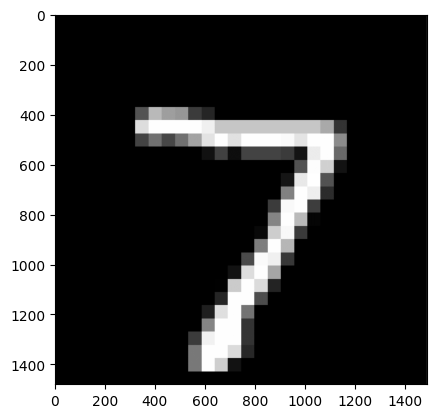

1/1 [==============================] - 0s 41ms/step
The Handwritten Digit is recognized as 7


In [74]:
input_image_path = input('Path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

# Displaying the image
plt.imshow(input_image)
plt.show()

# Convet it into grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Resize the image
input_image_resize = cv2.resize(grayscale, (28, 28))

# Scaling the image
input_image_resize = input_image_resize / 255 

# Reshape the image
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

# Prediction of input_image
input_prediciton = model.predict(image_reshaped)

input_prediciton_label = np.argmax(input_prediciton)
print(f"The Handwritten Digit is recognized as {input_prediciton_label}")